In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
filename = "data/mse_lab07.csv"

df = pd.read_csv(filename, skiprows=0, delimiter=',')

In [7]:
cw_indices = df[df.iloc[:, 0] == "%CW"].index.tolist()
rt_indices = [i + 1 for i in cw_indices]  # The next row contains hardness values

# Extract %CW and hardness values for Copper
cw_cu = df.iloc[cw_indices[0], 1:].dropna().values.astype(float)
rt_cu_rt = df.iloc[rt_indices[0], 1:].dropna().values.astype(float)
rt_cu_400 = df.iloc[rt_indices[1], 1:].dropna().values.astype(float)
rt_cu_500 = df.iloc[rt_indices[2], 1:].dropna().values.astype(float)

# Extract %CW and hardness values for Brass
cw_brass = df.iloc[cw_indices[3], 1:].dropna().values.astype(float)
rt_brass_rt = df.iloc[rt_indices[3], 1:].dropna().values.astype(float)
rt_brass_400 = df.iloc[rt_indices[4], 1:].dropna().values.astype(float)
rt_brass_500 = df.iloc[rt_indices[5], 1:].dropna().values.astype(float)

In [8]:
# Store the data in a structured dictionary for easier plotting
data = {
    "Copper": {
        "cw": cw_cu,
        "RT": rt_cu_rt,
        "400": rt_cu_400,
        "500": rt_cu_500,
    },
    "Brass": {
        "cw": cw_brass,
        "RT": rt_brass_rt,
        "400": rt_brass_400,
        "500": rt_brass_500,
    },
}

# Verify extracted data
data

{'Copper': {'cw': array([ 0.   ,  5.835, 11.29 , 19.679, 28.992, 37.723, 42.675, 50.055]),
  'RT': array([35.66666667, 39.66666667, 40.66666667, 45.        , 48.66666667,
         50.33333333, 52.        , 54.        ]),
  '400': array([40.16666667, 43.        , 45.43333333, 45.93333333, 48.16666667,
         37.5       , 42.36666667, 48.        ]),
  '500': array([38.66666667, 40.33333333, 45.        , 47.33333333, 49.83333333,
         34.16666667, 44.83333333, 48.66666667])},
 'Brass': {'cw': array([ 0.  ,  6.35, 11.11, 17.46, 22.22, 33.33, 41.27, 47.62]),
  'RT': array([66.83333333, 70.16666667, 74.66666667, 78.        , 82.33333333,
         84.83333333, 85.83333333, 87.33333333]),
  '400': array([66.        , 70.        , 76.33333333, 77.        , 81.33333333,
         82.66666667, 86.        , 87.        ]),
  '500': array([67.66666667, 71.        , 73.33333333, 78.5       , 80.66666667,
         72.        , 77.83333333, 83.66666667])}}

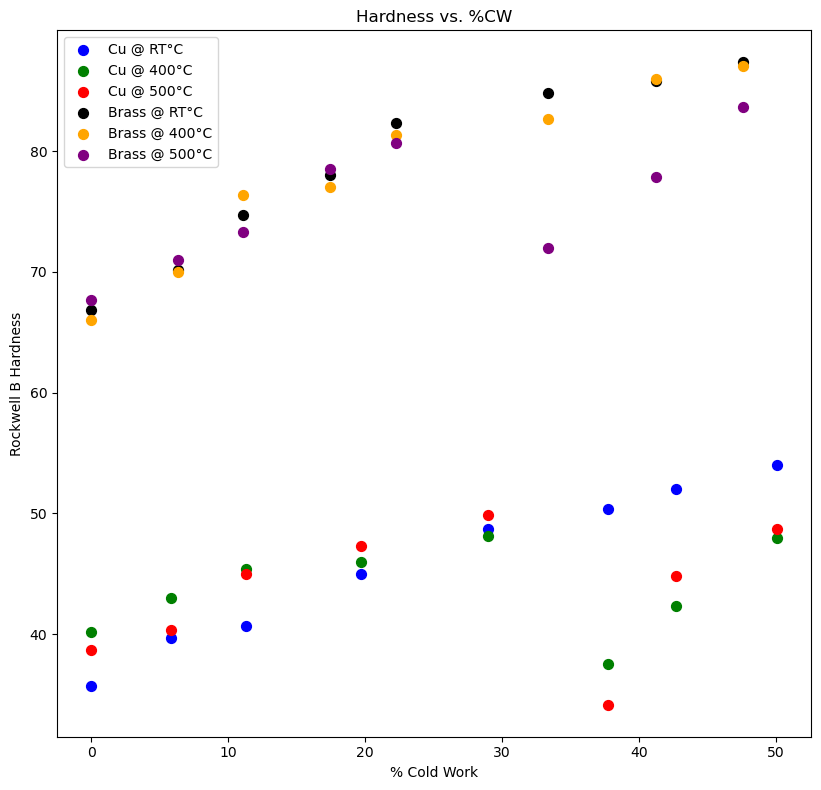

In [53]:
# Define colors and markers for different conditions
colors = {"RT": "blue", "400": "green", "500": "red"}
colors1 = {"RT": "black", "400": "orange", "500": "purple"}
markers = {"RT": "o", "400": "o", "500": "o"}

plt.figure(figsize=(16, 8))

# Plot Copper data
plt.subplot(1, 2, 1)
for condition in ["RT", "400", "500"]:
    plt.scatter(data["Copper"]["cw"], data["Copper"][condition], 
                label=f"Cu @ {condition}°C", color=colors[condition], marker=markers[condition], s=50)
# plt.xlabel("% Cold Work")
# plt.ylabel("Rockwell B Hardness")
# plt.title("Copper: Hardness vs. %CW")
# plt.legend()
# plt.grid(True)

# Plot Brass data
plt.subplot(1, 2, 1)
for condition in ["RT", "400", "500"]:
    plt.scatter(data["Brass"]["cw"], data["Brass"][condition], 
                label=f"Brass @ {condition}°C", color=colors1[condition], marker=markers[condition], s=50)
plt.xlabel("% Cold Work")
plt.ylabel("Rockwell B Hardness")
plt.title("Hardness vs. %CW")
plt.legend()
# plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()

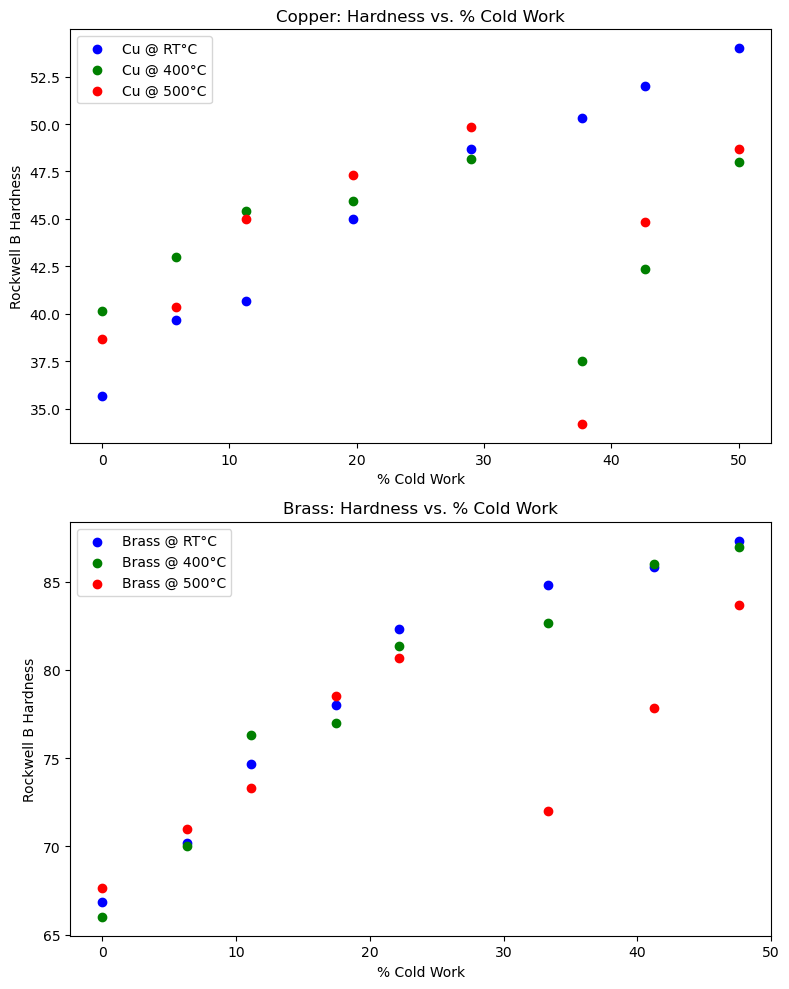

In [40]:
# Create subplots (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot for Copper
axes[0].scatter(data["Copper"]["cw"], data["Copper"]["RT"], label="Cu @ RT°C", color="blue", marker="o")
axes[0].scatter(data["Copper"]["cw"], data["Copper"]["400"], label="Cu @ 400°C", color="green", marker="o")
axes[0].scatter(data["Copper"]["cw"], data["Copper"]["500"], label="Cu @ 500°C", color="red", marker="o")
axes[0].set_xlabel("% Cold Work")
axes[0].set_ylabel("Rockwell B Hardness")
axes[0].set_title("Copper: Hardness vs. % Cold Work")
axes[0].legend()
# axes[0].grid(True)

# Plot for Brass
axes[1].scatter(data["Brass"]["cw"], data["Brass"]["RT"], label="Brass @ RT°C", color="blue", marker="o")
axes[1].scatter(data["Brass"]["cw"], data["Brass"]["400"], label="Brass @ 400°C", color="green", marker="o")
axes[1].scatter(data["Brass"]["cw"], data["Brass"]["500"], label="Brass @ 500°C", color="red", marker="o")
axes[1].set_xlabel("% Cold Work")
axes[1].set_ylabel("Rockwell B Hardness")
axes[1].set_title("Brass: Hardness vs. % Cold Work")
axes[1].legend()
# axes[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

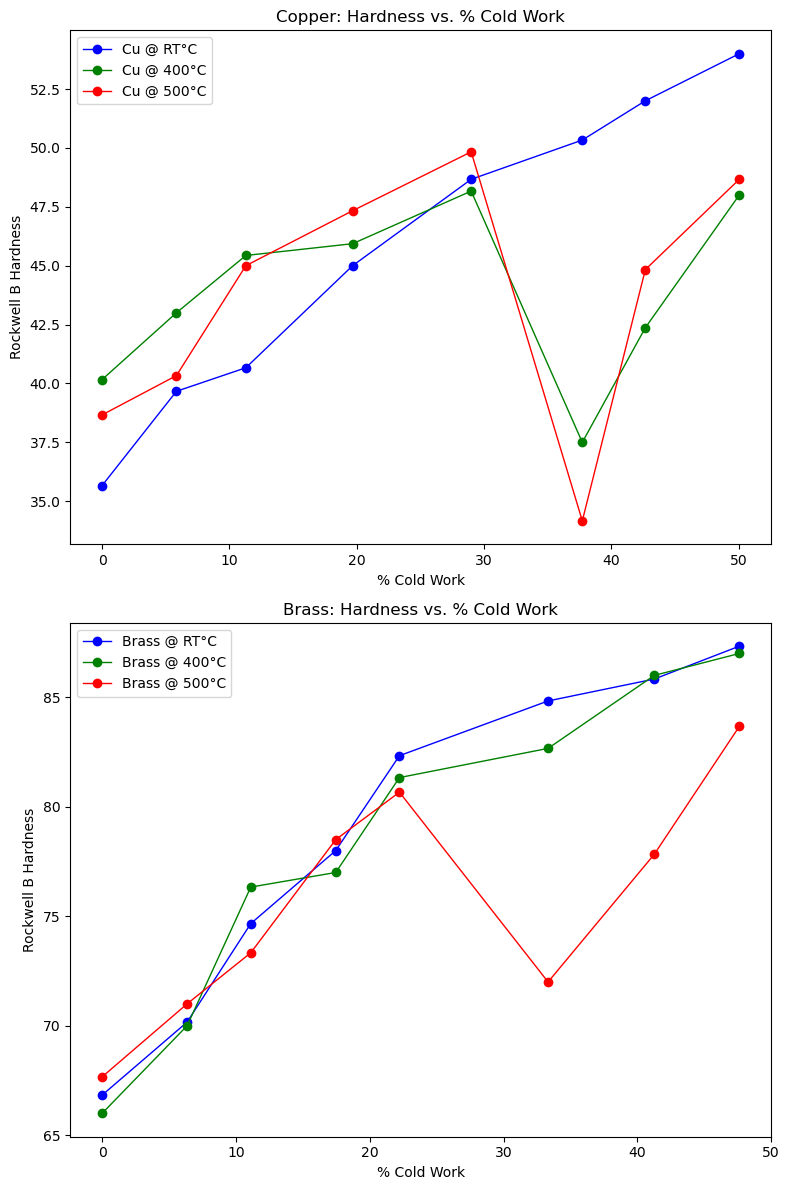

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))

# Copper Plot
ax1.plot(data["Copper"]["cw"], data["Copper"]["RT"], label="Cu @ RT°C", color="blue", marker="o", linestyle="-", linewidth=1)
ax1.plot(data["Copper"]["cw"], data["Copper"]["400"], label="Cu @ 400°C", color="green", marker="o", linestyle="-", linewidth=1)
ax1.plot(data["Copper"]["cw"], data["Copper"]["500"], label="Cu @ 500°C", color="red", marker="o", linestyle="-", linewidth=1)
ax1.set_xlabel("% Cold Work")
ax1.set_ylabel("Rockwell B Hardness")
ax1.set_title("Copper: Hardness vs. % Cold Work")
ax1.legend()
# ax1.grid(True)

# Brass Plot
ax2.plot(data["Brass"]["cw"], data["Brass"]["RT"], label="Brass @ RT°C", color="blue", marker="o", linestyle="-", linewidth=1)
ax2.plot(data["Brass"]["cw"], data["Brass"]["400"], label="Brass @ 400°C", color="green", marker="o", linestyle="-", linewidth=1)
ax2.plot(data["Brass"]["cw"], data["Brass"]["500"], label="Brass @ 500°C", color="red", marker="o", linestyle="-", linewidth=1)
ax2.set_xlabel("% Cold Work")
ax2.set_ylabel("Rockwell B Hardness")
ax2.set_title("Brass: Hardness vs. % Cold Work")
ax2.legend()
# ax2.grid(True)

plt.tight_layout()
plt.show()
